Importar las librerias de networkx y wntr.

In [1]:
import networkx as nx
import wntr
import numpy as np
import matplotlib.pylab as plt
from IPython.display import HTML
import pickle

Importar el archivo de la red (*.inp) y se guarda en la variable 'wn'.

In [2]:
#wn = wntr.network.WaterNetworkModel('nets/Chihuahua.inp')
wn = wntr.network.WaterNetworkModel('nets/Xicotepec_UAM_9.inp')

C:\Users\Daniela\anaconda3\envs\wdn\lib\site-packages\wntr\epanet\io.py:2173: UserWarning: Not all curves were used in "nets/Xicotepec_UAM_9.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


# Identificación de nodos y enlaces críticos - Métricas de Resilencia Topográfica

Para aplicar las métricas de resiliencia topográficas requieren que la red sea un grafo simple y no dirigido.
La variable 'wn' se convierte en un multigrafo dirigido representado con la variable 'G', posteriormente se utiliza para transformarla en un multigrafo no dirigido que se representa con la variable 'uG', por último esta variable se transforma en un grafo simple represntado con la variable 'sG'.

In [3]:
G = wn.get_graph() # directed multigraph
uG = G.to_undirected() # undirected multigraph
sG = nx.Graph(uG) # undirected simple graph

## Centralidad de intermediación
Calcular la intermedicación

In [4]:
betweenness_centrality = nx.betweenness_centrality(sG)
print(len(betweenness_centrality))

2048


Agregamos la intermediacion como atributo de los nodos

In [5]:
#itera entre todos los nodos de la red 
for node_name, node in wn.nodes():
    node.intermediacion = betweenness_centrality[node_name]

Graficamos la red de acuerdo a la intermediacion

(<matplotlib.collections.PathCollection at 0x2087c34ea30>,
 <matplotlib.collections.LineCollection at 0x2087c2ce040>)

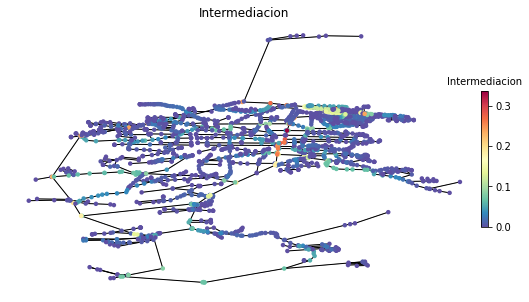

In [6]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10,5))
wntr.graphics.plot_network(wn, title='Intermediacion', node_attribute='intermediacion', node_colorbar_label='Intermediacion', filename="resultados/intemediacion.png",ax=ax1)

Agregamos el atributo intermediación a las tuberías. La intermediación de una tubería es el promedio de la intermediación de sus nodos incidentes

In [7]:
for pipe_name, pipe in wn.pipes(): # iteramos en la tuberia
    start_node = wn.get_node(pipe.start_node)   # obtenemos el nodo inicial
    end_node = wn.get_node(pipe.end_node)       # obtenemos el nodo final 
    # la intermediacionn de la tuberia sera la suma de las intermediaciones de sus nodos entre 2
    pipe.intermediacion = (start_node.intermediacion + end_node.intermediacion) / 2 

## Excentricidad
Distancia al nodo más lejano

(<matplotlib.collections.PathCollection at 0x2082fec3e80>,
 <matplotlib.collections.LineCollection at 0x2087c506ac0>)

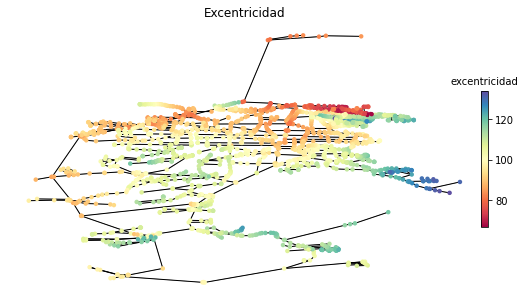

In [8]:
eccentricity = nx.eccentricity(uG)
for node_name, node in wn.nodes():
    node.excentricidad = eccentricity[node_name]
fig, (ax1) = plt.subplots(1, 1, figsize=(10,5))
wntr.graphics.plot_network(wn, title='Excentricidad', node_attribute='excentricidad',node_cmap='Spectral', filename="resultados/excentricidad.png",node_colorbar_label='excentricidad',ax=ax1)

Agregamos el atributo excentricidad a las tuberías. La excentricidad de una tubería es el promedio de la excentricidad de sus nodos incidentes

In [9]:
for pipe_name, pipe in wn.pipes(): # iteramos en la tuberia
    start_node = wn.get_node(pipe.start_node)   # obtenemos el nodo inicial
    end_node = wn.get_node(pipe.end_node)       # obtenemos el nodo final 
    # la excentricidad de la tuberia sera la suma de las excentricidades de sus nodos entre 2
    pipe.excentricidad = (start_node.excentricidad + end_node.excentricidad) / 2 

## Centralidad de cercanía
Reciproco de la suma de las distancias a todos los nodos

(<matplotlib.collections.PathCollection at 0x2087c9679d0>,
 <matplotlib.collections.LineCollection at 0x2087c2cfb80>)

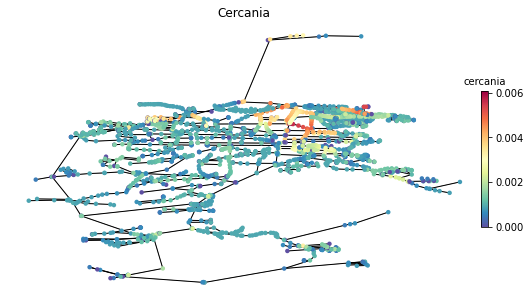

In [10]:
closeness_centrality = nx.closeness_centrality(G)
for node_name, node in wn.nodes():
    node.cercania = closeness_centrality[node_name]
fig, (ax1) = plt.subplots(1, 1, figsize=(10,5))
wntr.graphics.plot_network(wn, title='Cercania', node_attribute='cercania', filename="resultados/cercania.png", node_colorbar_label='cercania',ax=ax1)

Agregamos el atributo cercania a las tuberías. La cercania de una tubería es el promedio de la cercania de sus nodos incidentes

In [11]:
for pipe_name, pipe in wn.pipes(): # iteramos en la tuberia
    start_node = wn.get_node(pipe.start_node)   # obtenemos el nodo inicial
    end_node = wn.get_node(pipe.end_node)       # obtenemos el nodo final 
    # la cercania de la tuberia sera la suma de las cercanias de sus nodos entre 2
    pipe.cercania = (start_node.cercania + end_node.cercania) / 2 

## Grado de nodo
Cantidad de enlaces que tiene un nodo

Calculamos el grado nodal

(<matplotlib.collections.PathCollection at 0x2087c9de130>,
 <matplotlib.collections.LineCollection at 0x2087ca542e0>)

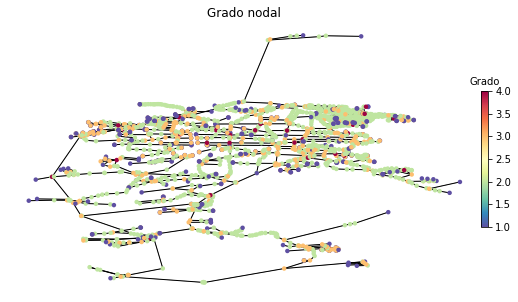

In [12]:
node_degree = G.degree()
#itera entre todos los nodos de la red 
for node_name, node in wn.nodes():
    node.grado = node_degree[node_name]
fig, (ax2) = plt.subplots(1, 1, figsize=(10,5))
wntr.graphics.plot_network(wn, title='Grado nodal', node_attribute='grado', filename="resultados/grado.png", node_colorbar_label='Grado',ax=ax2)

Agregamos el atributo grado a las tuberías. El grado de una tubería es el promedio de los grados sus nodos incidentes

In [13]:
for pipe_name, pipe in wn.pipes(): # iteramos en la tuberia
    start_node = wn.get_node(pipe.start_node)   # obtenemos el nodo inicial
    end_node = wn.get_node(pipe.end_node)       # obtenemos el nodo final 
    # El grado de la tuberia sera la suma de los grados de sus nodos entre 2
    pipe.grado = (start_node.grado + end_node.grado) / 2 

In [14]:
for pipe_name, pipe in wn.pipes(): # iteramos en la tuberia
    pipe.al = 1 

# Estimación de la Resilencia - Métricas de Resilencia Hidráulica

## Disponibilidad de servicio de agua

Primero se calcula la demana esperada, si la demanda esperada es cero, el resultado es indefinido (NaN). 
La disponibilidad de servicio wsa = demanda / demanda esperada. Se puede calcular un promedio o calcular por cada nodo

In [15]:
def disp_serv():
    # en cada nodo y en cada paso de tiempo
    expected_demand = wntr.metrics.expected_demand(wn)
    demand = results.node['demand'].loc[:,wn.junction_name_list]
    wsa = wntr.metrics.water_service_availability(expected_demand, demand)  
    wsa.index = wsa.index / 3600 #convierte el tiempo a horas
    # promedio en cada paso de tiempo
    wsa_t = wntr.metrics.water_service_availability(expected_demand.sum(axis=1), demand.sum(axis=1))
    wsa_t.index = wsa_t.index / 3600 #convierte el tiempo a horas
    
    # Graficamos la disponibilidad en el servicio de agua
    wsa.plot(ax=plt.gca(), legend=False)
    wsa_t.plot(ax=plt.gca(), label='Promedio', color='k', linewidth=3.0, legend=True)
    plt.ylim( (-0.05, 1.05) )
    plt.ylabel('Disponibilidad de servicio')
    plt.xlabel('Tiempo (hrs.)') 
    plt.savefig("resultados/disp_serv.png")
    return wsa

# Simulacion de ataques

## Probabilidad de ataque
Define la probabilidad de ataque con base en alguna de las metricas de resilencia topográfica. La probabilidad de fallo debe sumar 1.  

In [16]:
def ataque_grado():
    tuberia_grados = wn.query_link_attribute('grado',link_type=wntr.network.Pipe)
    failure_probability = tuberia_grados/tuberia_grados.sum()
    return failure_probability

def ataque_intermediacion():
    tuberia_intermediacion = wn.query_link_attribute('intermediacion',link_type=wntr.network.Pipe)
    failure_probability = tuberia_intermediacion/tuberia_intermediacion.sum()
    return failure_probability

def ataque_cercania():
    tuberia_cercania = wn.query_link_attribute('cercania',link_type=wntr.network.Pipe)
    failure_probability = tuberia_cercania/tuberia_cercania.sum()
    return failure_probability

def ataque_aleatorio():
    tuberia_al = wn.query_link_attribute('al',link_type=wntr.network.Pipe)
    failure_probability = tuberia_al/tuberia_al.sum()
    return failure_probability

## Configuración del Modelo Hidraúlico

In [17]:
wn.options.hydraulic.demand_model = 'PDD'
duracion = 48*3600 #en segundos (2 dias)
intervalo_tiempo = 1800
wn.options.time.duration = duracion
wn.options.time.hydraulic_timestep = intervalo_tiempo
wn.options.time.report_timestep = intervalo_tiempo #cada media hora registra resultados
wn.options.hydraulic.required_pressure = 67
wn.options.hydraulic.minimum_pressure = 3

## 1) Simulacion hidruilca sin ataques

In [18]:
# Simulate hydraulics and store results
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

KeyboardInterrupt: 

In [18]:
#calculamos demanda y presion
demand = results.node['demand']
pressure = results.node['pressure']

NameError: name 'results' is not defined

## 2) Simulacion hidraulica con ataques
### Establecer tipo de ataque

Definir la probabilidad de fallo de acuerdo al tipo de ataque pueder ser por grado, intermediacion o cercanía

In [27]:
#failure_probability = ataque_grado()
#failure_probability = ataque_aleatorio()
failure_probability = ataque_intermediacion()
#failure_probability = ataque_cercania()

Guarda una copia del modelo de red en f

In [28]:
f=open('wn.pickle','wb')
pickle.dump(wn,f)
f.close()

# Run num_fallos realizations
results = {} # Initialize dictionary to store results
np.random.seed(67823) # Set random seed

In [29]:
num_fallos = 1
# Select the number of leaks, random value between 1 and num_fallos
N = np.random.randint(1,num_fallos+1)

# Select N unique pipes based on failure probability
pipes_to_fail = np.random.choice(failure_probability.index, num_fallos,replace=False,p=failure_probability.values)

# Select time of failure, uniform dist, between 1 and 10 hours
time_of_failure = np.round(np.random.uniform(1,10,1)[0], 2)

# Select duration of failure, uniform dist, between 12 and 6 hours
duration_of_failure = np.round(np.random.uniform(0,12,1)[0], 2)
print('Tubería con fuga: ' + str(pipes_to_fail) + ', Inicio de la fuga: ' + str(time_of_failure) + ', Termino de la figa: ' + \
            str(time_of_failure+duration_of_failure))

Tubería con fuga: ['T1809'], Inicio de la fuga: 4.82, Termino de la figa: 6.82


In [30]:
# Add leaks to the model
for pipe_to_fail in pipes_to_fail:
    pipe = wn.get_link(pipe_to_fail)
    leak_diameter = pipe.diameter*0.3
    leak_area=3.14159*(leak_diameter/2)**2
    wn = wntr.morph.split_pipe(wn, pipe_to_fail, pipe_to_fail + '_B', pipe_to_fail+'leak_node')
    leak_node = wn.get_node(pipe_to_fail+'leak_node')
    leak_node.add_leak(wn, area=leak_area,start_time=time_of_failure*3600,end_time=(time_of_failure + duration_of_failure)*3600)

In [31]:
# Simulate hydraulics and store results
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

RuntimeError: Simulation did not converge. Reached maximum number of iterations: 2999

In [ ]:
#calculamos demanda y presion
demand = results.node['demand']
pressure = results.node['pressure']
    
# Reload the water network model
f=open('wn.pickle','rb')
wn = pickle.load(f)
f.close()

### Grafica de resultados

In [ ]:
wsa = disp_serv()
#anim_disp_serv(wsa)